c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\networkx\drawing\nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(




No 1 Komunitas 0 : ['kantahkaboki', 'ditjentataruang', 'kantahkabmubar']
Banyak Node: 3


No 2 Komunitas 2 : ['kumparan', 'nntweetnn', 'antipki19', 'tempodotco', 'qoirudineki', 'afrchamp', 'sangiranflying', 'berlandgroup', 'tvrinewscom', 'amirelbahriy', 'politik___', 'jamalhabsy']
Banyak Node: 10


No 3 Komunitas 3 : ['jokowi', 'syarifiirvan', 'katadatacoid', 'avibkah', 'tmahartomo071', 'didikekky', 'tanlychat', 'cak_x01', 'bentangimaji', '_indonesiamaju_', 'mimi_chimmy', 'retnosetyow4t', 'laingenlisa', 'rahwan_asep', 'penjagajokowi1', 'sudar586028012', 'tolakbigotnkri', 'kelianbanjar_gk', '4y4nkz', 'elpanjullo', 'david_wijaya03', 'richardodhstio', 'richardo_tio', 'tio_richardo', 'dianaaurora96', 'arrayah43832329', 'aswadbaihaqi', 'maliqridwane', 'idey69881575', 'jisatu01', 'gem_1000x', 'dpdgppsultra', 'viksory', 'sejarahlokal', 'blasteerst', 'husainzain25652', 'kiyai_marufamin', 'prabowo', 'arsikamadja', 'gerbangnkri', 'jinjit_jinjit']
Banyak Node: 15


No 4 Komunitas 6 : ['waduhaku

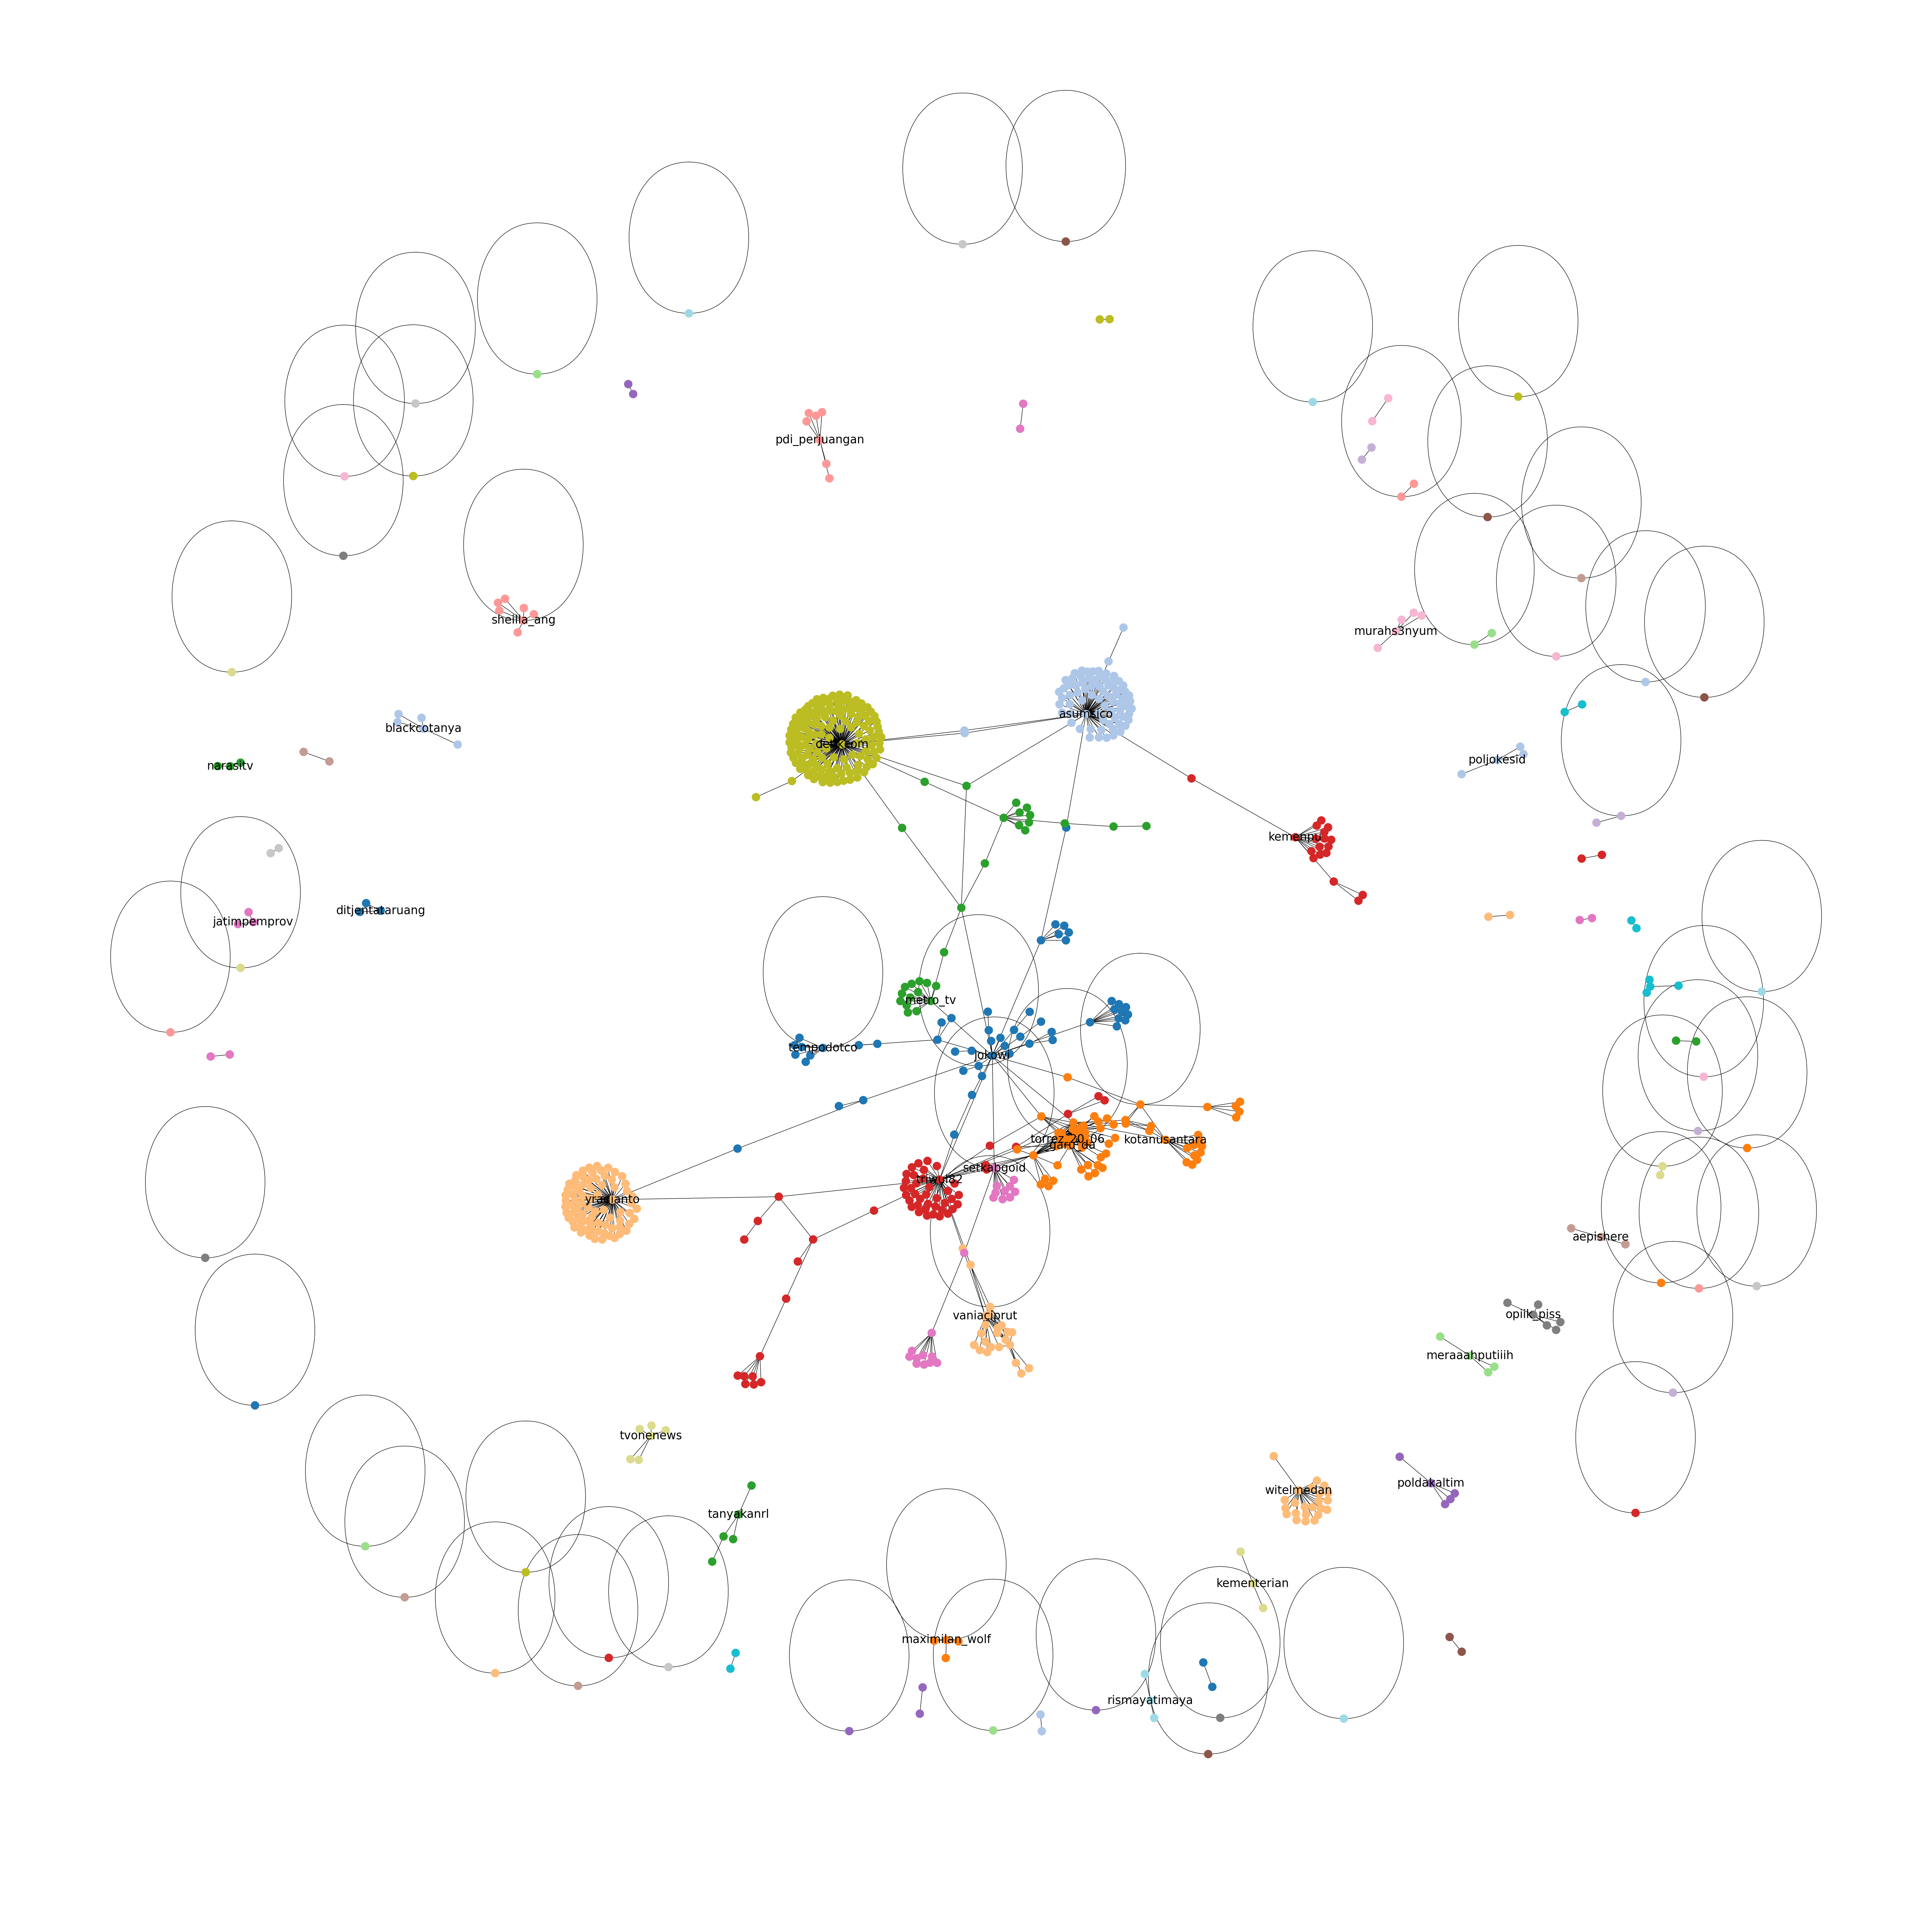

In [119]:
import pandas as pd
import networkx as nx
import community
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Membaca data dari file CSV
# data = pd.read_csv('net_IKN_Nusantara.csv')
data = pd.read_csv('net_IKN_Nusantara_New.csv')

# Mengambil kolom kedua dan ketiga
subset_data = data.iloc[:, [1, 2]]

# Membuat graf dari subset data
G = nx.from_pandas_edgelist(subset_data, source='from', target='to')

# Menjalankan algoritma Louvain
partition = community.best_partition(G)

# Mengatur posisi node pada graf
pos = nx.spring_layout(G)

# Mengambil jumlah komunitas
num_communities = max(partition.values()) + 1

# Membuat colormap dengan jumlah warna sesuai jumlah komunitas
cmap = cm.get_cmap('tab20', num_communities)

# Menentukan ukuran canvas
fig, ax = plt.subplots(figsize=(75, 75))

# Menggambar node pada graf dengan warna sesuai komunitas
node_colors = [cmap(partition[node]) for node in G.nodes]
nx.draw_networkx_nodes(G, pos, node_color=node_colors, cmap=cmap, ax=ax)

# Menggambar edge pada graf
nx.draw_networkx_edges(G, pos, ax=ax)

# Menampilkan label node dengan font size berdasarkan jumlah degree tertinggi di setiap komunitas
count = 0
max_com = []
arr_com = []
node_degrees_arr = []
max_degree_community = None

font_size=25
for community_id in set(partition.values()):
    community_nodes = [node for node, c_id in partition.items() if c_id == community_id]
    if len(community_nodes) > 2:
        count += 1
        subgraph = G.subgraph(community_nodes)
        node_degrees = dict(subgraph.degree())
        max_degree = max(node_degrees.values())
        labels = {node: node if degree == max_degree else '' for node, degree in node_degrees.items()}
        nx.draw_networkx_labels(subgraph, pos, labels=labels, font_size=font_size, ax=ax)
        print("\n")
        print("No", count, "Komunitas", community_id, ":", community_nodes)
        max_com.append(max_degree)
        arr_com.append(community_nodes)
        node_degrees_arr.append(node_degrees)
        
        print("Banyak Node:", max_degree + 1)


#take top 5 degree
max_com.sort(reverse=True)
top5 = max_com[:5]

# Sort the nested lists based on their length in descending order
arr_com.sort(key=len, reverse=True)

# Select the top 2 nested lists
top5node = arr_com[:5]

# Menampilkan jumlah komunitas
max_length_array = max(arr_com, key=len)
max_com_max = max(max_com)+1  # Get the maximum value from max_com list

print("===========================================")
print("Komunitas terbanyak memiliki: ", max_com_max,"Node")
print("Dengan Isi komunitas:", max_length_array)



# Menampilkan hasil visualisasi
plt.axis('off')
plt.show()


In [120]:
print("5 Komunitas dengan node terbanyak:")
for items in top5node:
    print(items)
    print("Banyak Node:", len(items))
    print("===========================================")

5 Komunitas dengan node terbanyak:
['detikcom', 'detik_sulsel', 'prasetiyoep', 'abehanief', 'ockysaputraa', 'ryanbakkaru', 'paidweb3', 'shandyjepret', 'babyjoenadira', 'yuskareem63', 'alimudi84052003', 'sandhey6', 'eknug', 'msmyoibae', 'punyadims', 'rananusantari', 'peterloveyou', 'adc14089', 'chris_azura', 'yanhendrik', 'oktayudhi', 'selasa98', 'fthrtwentyone', 'wztya9', 'damarholic', 'salwafhr30', 'vivacoid', 'ygndini_feb', 'azky_rk', 'imamwahidd', 'koeglodag', 'kurniawanricho', 'skcngwur', 'greenoto', 'zaeni_aditya', 'ifanmayo_', 'mesofullove_', 'yamjonkur', 'langx_wiratama', 'girolyar', 'dimasoemardjono', 'airazal', 'petroeq', 'agnan1923', 'idoymaridoy', 'mxrozaq', 'anang_ssanto', 'sammyfish13', 'vvchrstn', 'gebmoon', 'newsuriteladan', 'streamingdino', 'riofebrian02', 'dadangadi8', 'weiinnn', 'putirwn', 'raaraapo_', 'soobinjateng', 'dvntnggrn', 'juvejack', 'pokemon_udara', 'snowdropbae', 'agusssshhhhh', '1rfantastic', 'iantrucker', 'awindul', 'officialwawan', 'putrosukarno', 'talak

In [129]:
print("Node dengan degree terbanyak:")
# Sort the dictionaries based on their values in descending order
sorted_dicts = sorted(node_degrees_arr, key=lambda x: max(x.values()), reverse=True)
sorted_dicts_highestvalue = [{k: v for k, v in sorted(d.items(), key=lambda x: x[1], reverse=True)} for d in sorted_dicts]
# Print the top two dictionaries
for i in sorted_dicts_highestvalue[:5]:
    print(len(i))
    print(i)


Node dengan degree terbanyak:
134
{'detikcom': 132, 'ockysaputraa': 2, 'dhu_dhuan': 1, 'yotifolk': 1, 'kancilcungkring': 1, 'akbar_gremory': 1, 'shandyjepret': 1, 'oktayudhi': 1, 'zerahyaa': 1, 'vivacoid': 1, 'ysbcht_': 1, 'vitabangun': 1, 'soobinjateng': 1, 'airazal': 1, 'retywie': 1, 'baru354': 1, 'mugiahdht': 1, 'kurniawanricho': 1, 'ichigo97538820': 1, 'ydknrf': 1, 'mxrozaq': 1, 'novita_kaunang': 1, 'riofebrian02': 1, 'kokoaja4': 1, 'punyadims': 1, 'weiinnn': 1, 'petroeq': 1, 'asmaraidaleni': 1, 'iantrucker': 1, 'barca_joss': 1, 'panggilsajapida': 1, '1rfantastic': 1, 'prasetiyoep': 1, 'estersagala4': 1, 'naeni_romayati': 1, 'achmadbandi': 1, 'dadangadi8': 1, 'abehanief': 1, 'rizwandhaimawa1': 1, 'novanpramadi12': 1, 'dvntnggrn': 1, 'mesofullove_': 1, 'ygndini_feb': 1, 'paidweb3': 1, 'riandi_12': 1, 'msalmanhdr': 1, 'artregular': 1, 'yamjonkur': 1, 'damarholic': 1, 'kopimovie': 1, 'himechwaan': 1, 'ndrys_': 1, 'ifanmayo_': 1, 'imamwahidd': 1, 'witaresw': 1, 'ryanbakkaru': 1, 'jeong

In [134]:
class FindUser:
    def __init__(self, data, user):
        self.data = data
        self.user = user
        self.found = False
        self.author = None
        self.title = None
        self.label = None
        for i in data.index:
            if(data['author'][i] == self.user):
                self.author = data['author'][i]
                self.title = data['title'][i]
                self.label = data['sentiment_label'][i]
                self.found = True
                break            

    def title(self):
        if(self.title):
            return self.title
    
    def label(self):
        if(self.label):
            return self.label

    def author(self):
        if(self.author):
            return self.author

count = 0
for items in top5nodecommunities:
    count= count+1
    data1 = pd.read_csv('IKN_Nusantara.csv')
    community = items
    firstuser = items
    user = FindUser(data1, firstuser)
    # print(firstuser)
    print("Komunitas", count, ":", community)
    print("User: ", user.author, end="\n")
    print("Tweet: ", user.title, end="\n")
    print("Label: ", user.label, end="\n")
    print("===========================================")


Komunitas 1 : detikcom
User:  detikcom
Tweet:  Sebanyak 2.500 Aparatur Sipil Negara (ASN) akan mulai dipindah secara bertahap ke Ibu Kota Negara (IKN) Nusantara, Kalimantan Timur (Kaltim) tahun 2024. #ASN #IKN  Via: @detik_sulsel  https://t.co/ckujwYoIRT
Label:  Positive
Komunitas 2 : asumsico
User:  asumsico
Tweet:  Pemerintah secara terbuka mengajak seluruh masyarakat Indonesia untuk berpartisipasi memilih logo kota Nusantara sebagai Ibu Kota Negara yang baru. https://t.co/SmMZFVFWtJ
Label:  Positive
Komunitas 3 : yradianto
User:  None
Tweet:  None
Label:  None
Komunitas 4 : triwul82
User:  triwul82
Tweet:  Pemerintah menggelar pemilihan logo Ibu Kota Negara (IKN) Nusantara berhadiah sepeda motor listrik. Pemilihan logo ini bisa diikuti masyarakat umum. Logo dengan pemilih terbanyak nantinya akan digunakan sebagai logo resmi IKN. Proses pemilihan (voting) logo IKN Nusantara sudah… https://t.co/VUxp9Ui73j https://t.co/JC7T0QuDvj
Label:  Positive
Komunitas 5 : torrez_20_06
User:  None
